<a href="https://colab.research.google.com/github/ehsung/PUBH6886/blob/main/PUBH6886_FinalProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [3]:
# Install Libraries
install.packages("caret")
install.packages("ggplot2")
install.packages("pROC")
install.packages("leaps")
install.packages("glmnet")
install.packages("pls")
install.packages("gridExtra")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("randomForest")
install.packages("gbm")
install.packages("naivebayes")
install.packages("psych")
install.packages("naniar")
install.packages("reshape2")
install.packages("doParallel")
install.packages("kernlab")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’


In [4]:
# Load libraries
library(readr)
library(dplyr)
library(caret)
library(ggplot2)
library(pROC)
library(leaps)
library(glmnet)
library(pls)
library(gridExtra)
library(rpart)
library(rpart.plot)
library(randomForest)
library(gbm)
library(splines)
library(naivebayes)
library(psych)
library(naniar)
library(reshape2)
library(doParallel)
library(kernlab)

Loading required package: ggplot2

Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: Matrix

Loaded glmnet 4.1-8


Attaching package: ‘pls’


The following object is masked from ‘package:caret’:

    R2


The following object is masked from ‘package:stats’:

    loadings



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine


Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



# Load and Clean the Data

In [5]:
# Load the diabetes_012_health_indicators_BRFSS2015.csv data
diabetes_rawData <- read_csv("/content/diabetes_012_health_indicators_BRFSS2015.csv")

Rows: 253680 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, He...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
# Check the loaded data (Transposed for easier full viewing)
t(head(diabetes_rawData))

Diabetes_012,0,0,0,0,0,0
HighBP,1,0,1,1,1,1
HighChol,1,0,1,0,1,1
CholCheck,1,0,1,1,1,1
BMI,40,25,28,27,24,25
Smoker,1,1,0,0,0,1
Stroke,0,0,0,0,0,0
HeartDiseaseorAttack,0,0,0,0,0,0
PhysActivity,0,1,0,1,1,1
Fruits,0,0,1,1,1,1
Veggies,1,0,0,1,1,1


In [7]:
# Shape of the dataset
dim(diabetes_rawData)

[1] 253680     22

In [8]:
# Value Count and Class Distrubtion of Response (Diabetes)
table(diabetes_rawData$Diabetes_012)


     0      1      2 
213703   4631  35346 

In [9]:
# Due to the computational resources and the need for class balance in machine learning models
# For initial machine learning development, I decided for a simple approach by:
# Keeping all of the value 2 -- diabetes (Target Interest)
# Removing all of the value 1 -- prediabetes (Off Target Interest, so not needed)
# Randomly Subset the value 0 -- no diabetes (Match number of yes diabetes for balanced class)

set.seed(123)

# Keeping all of the value 2; Removing all of the value 1
diabetes_subset <- diabetes_rawData %>%
  filter(Diabetes_012 == 2)

# Randomly Subset the value 0
sampling_size <- sum(diabetes_rawData$Diabetes_012 == 2)

tmp_diabetes_0 <- diabetes_rawData %>%
  filter(Diabetes_012 == 0) %>%
  sample_n(size = sampling_size, replace = FALSE)

# Combine the subset dataframes into a new dataset
diabetes_newData <- rbind(diabetes_subset, tmp_diabetes_0)

# Rename Diabetes_012 to just Diabetes
diabetes_newData <- diabetes_newData %>%
  rename(Diabetes = Diabetes_012) %>%
  mutate(Diabetes = ifelse(Diabetes == 2, "Yes", "No")) # Convert to '2 = Yes' and '0 = No'

table(diabetes_newData$Diabetes)


   No   Yes 
35346 35346 

In [10]:
# Shape of the new dataset
dim(diabetes_newData)

[1] 70692    22

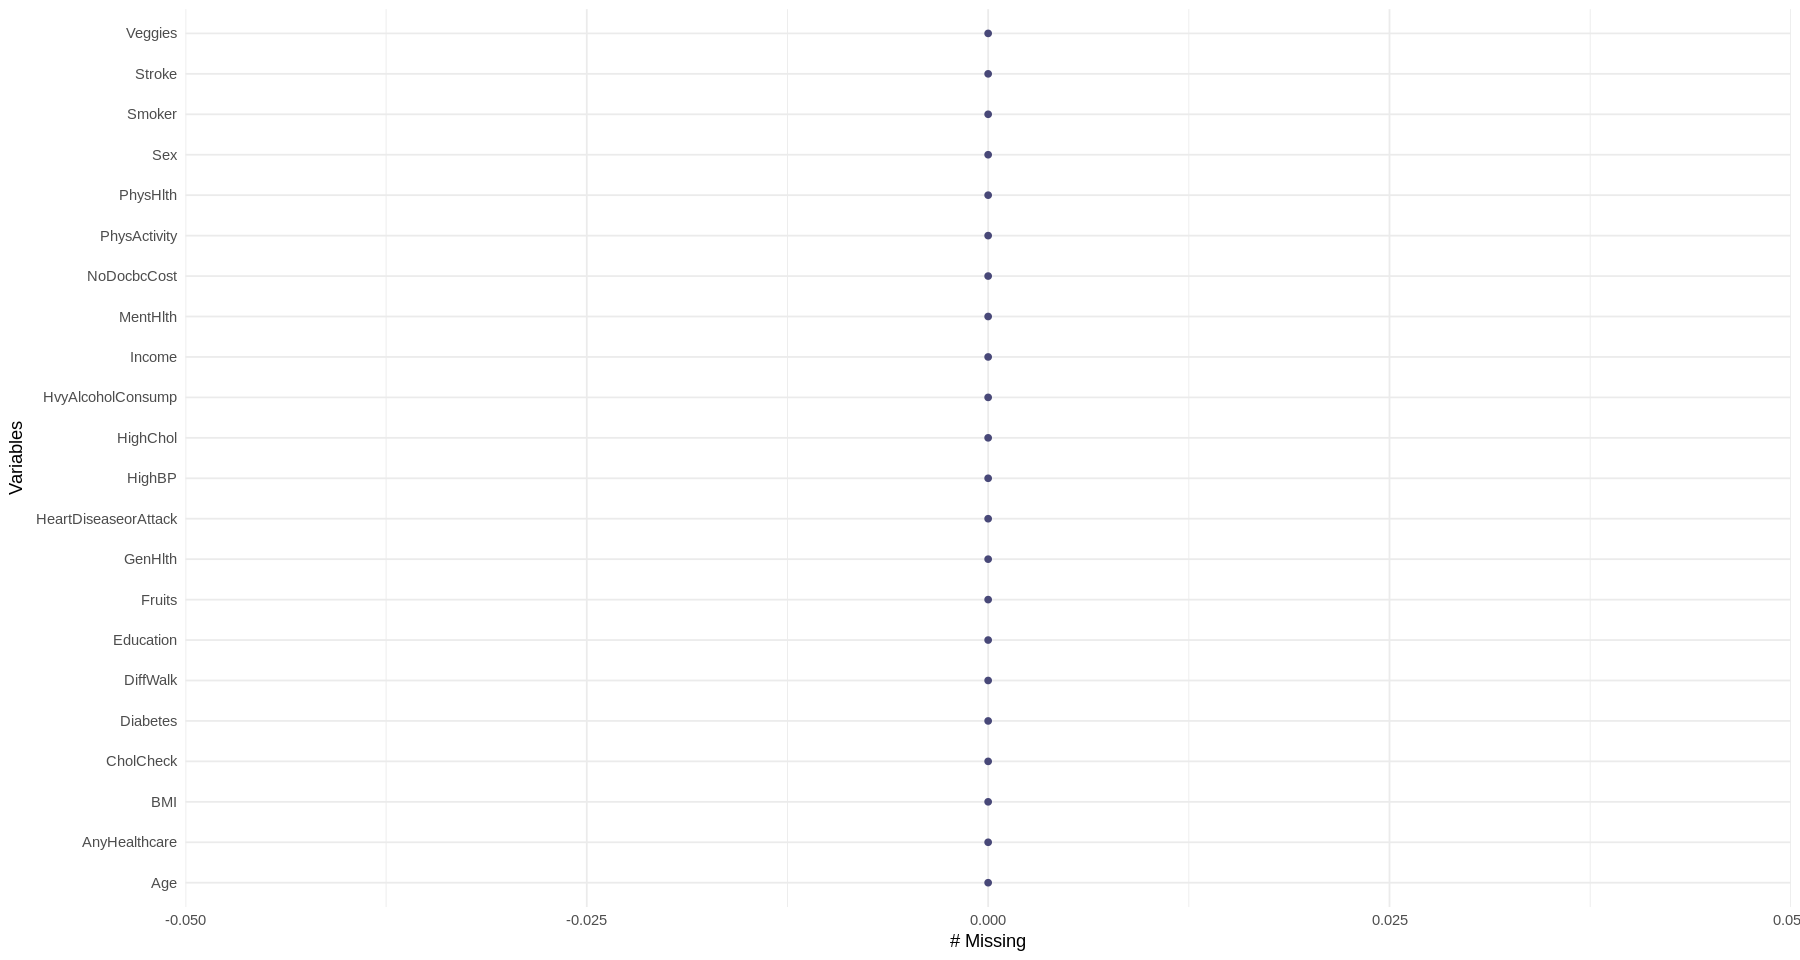

In [11]:
# Check for missing data -- There are no missing data
options(repr.plot.width = 15, repr.plot.height = 8)

gg_miss_var(diabetes_newData)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


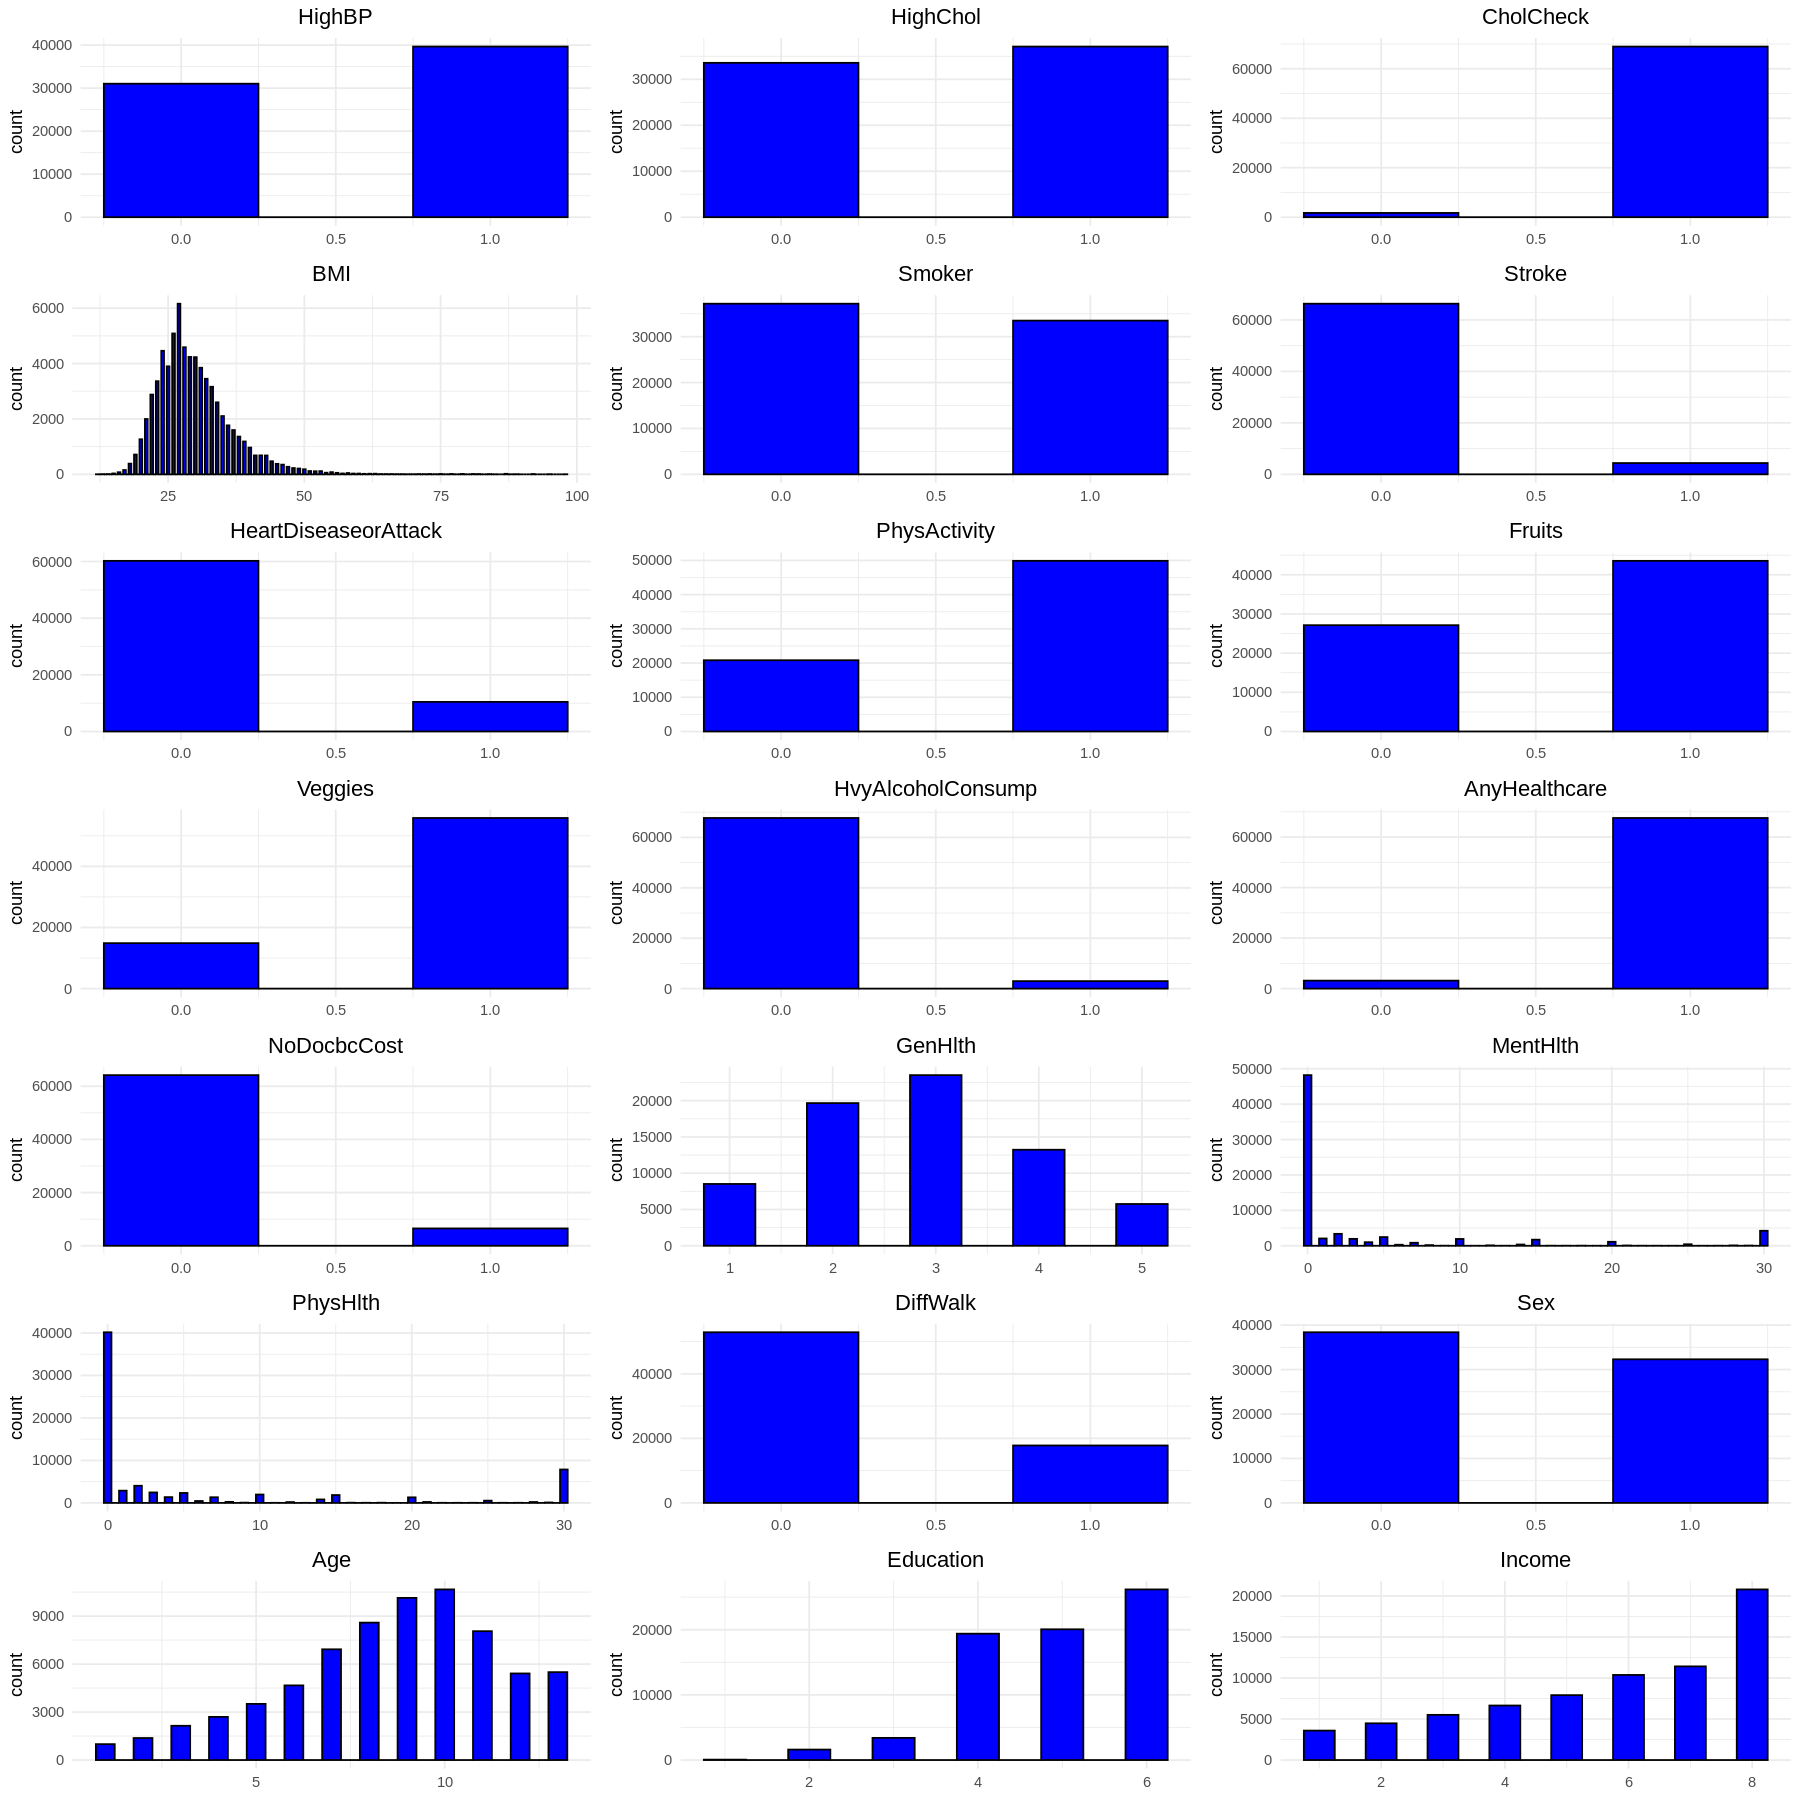

In [12]:
# Plot all feature columns to see distribution and to evaluate if it needs to be factored as a catagorical
options(repr.plot.width = 15, repr.plot.height = 15)

hist_plots <- lapply(names(diabetes_newData)[names(diabetes_newData) != "Diabetes"], function(col) {
  ggplot(diabetes_newData, aes_string(x = col)) +
    geom_histogram(binwidth = 0.5, fill = "blue", color = "black") +
    theme_minimal() +
    ggtitle(col) +
    theme(
      plot.title = element_text(hjust = 0.5),
      axis.title.x = element_blank()
    )
})

# Plot and arrange in a grid
grid.arrange(grobs = hist_plots, ncol = 3, padding = uni(2, "cm"))

In [13]:
# Looks like BMI is the only numerical feature, all other are catagorical, which will be factored
diabetes_newData <- diabetes_newData %>%
  mutate(across(c(Diabetes,
                  HighBP,
                  HighChol,
                  CholCheck,
                  Smoker,
                  Stroke,
                  HeartDiseaseorAttack,
                  PhysActivity,
                  Fruits,
                  Veggies,
                  HvyAlcoholConsump,
                  AnyHealthcare,
                  NoDocbcCost,
                  GenHlth,
                  MentHlth,
                  PhysHlth,
                  DiffWalk,
                  Sex,
                  Age,
                  Education,
                  Income), as.factor))

str(diabetes_newData)

tibble [70,692 × 22] (S3: tbl_df/tbl/data.frame)
 $ Diabetes            : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 2 2 2 2 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 1 2 2 2 2 2 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ BMI                 : num [1:70692] 30 25 28 23 27 37 28 27 34 24 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 2 1 2 2 2 2 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 2 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 2 1 1 1 1 2 2 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 1 1 1 2 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 1 2 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 2 2 1 2 2 2 2 1 1 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Fac

In [14]:
# Split the data for a hidden test_data for final evaluation
# But also further reduce the training data size due to computational limits
# Split 40% train_data, 60% test_data
set.seed(123)

train_index <- createDataPartition(diabetes_newData$Diabetes, p = 0.40, list = FALSE)

train_data <- diabetes_newData[train_index, ]
test_data <- diabetes_newData[-train_index, ]

# Save the splits into to csv
# write.csv(train_data, file = "cleaned_train_data.csv", row.names = FALSE)
# write.csv(test_data, file = "cleaned_test_data.csv", row.names = FALSE)

In [15]:
# Size of train_data
dim(train_data)

[1] 28278    22

In [16]:
# Size of test_data
dim(test_data)

[1] 42414    22

In [17]:
# Double check balance class distribution in train data
table(train_data$Diabetes)


   No   Yes 
14139 14139 

In [18]:
# Double check balance class distribution in test data
table(test_data$Diabetes)


   No   Yes 
21207 21207 

# Visualizing the train_data set

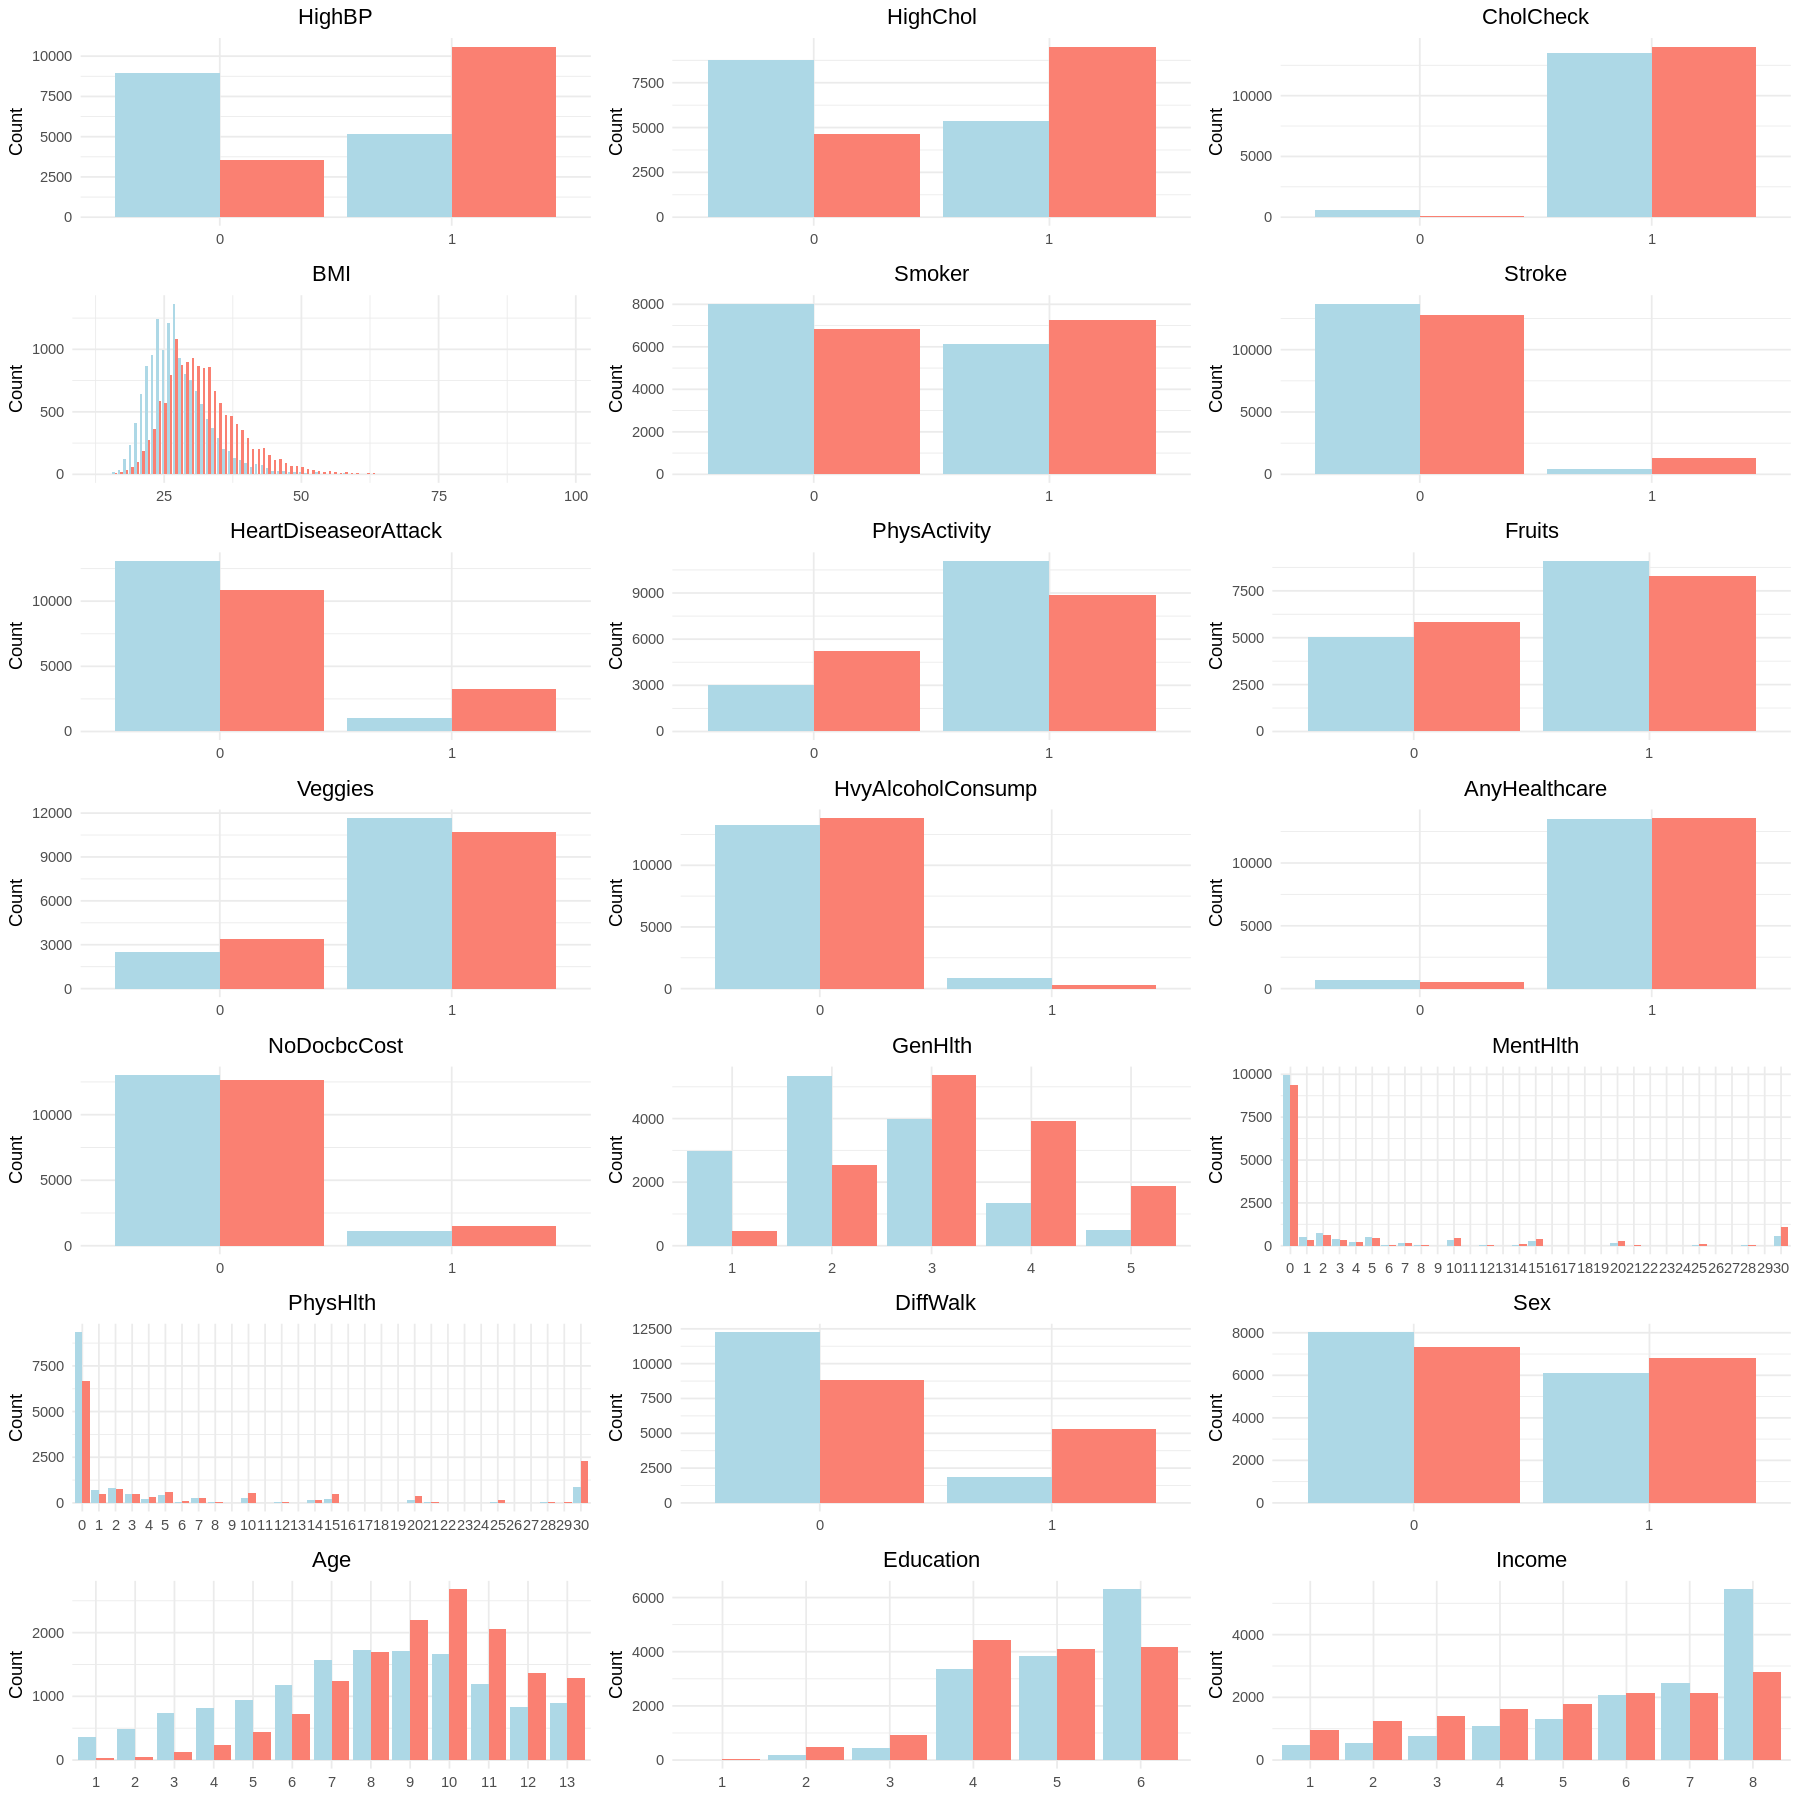

In [53]:
# Same histogram plots, but in relation to the target predictor (Diabetes)
# Blue is No - Diabetes
# Red is Yes - Diabetes
options(repr.plot.width = 15, repr.plot.height = 15)

predictors <- colnames(train_data)[colnames(train_data) != "Diabetes"]

hist_plots <- lapply(predictors, function(predictor) {
  ggplot(train_data, aes(x = .data[[predictor]], fill = Diabetes)) +
    suppressWarnings(geom_histogram(stat = "count", position = "dodge")) +
    labs(x = predictor,
         y = "Count") +
    theme_minimal() +
    scale_fill_manual(values = c("No" = "lightblue", "Yes" = "salmon")) +
    ggtitle(predictor) +
    theme(
      plot.title = element_text(hjust = 0.5),
      axis.title.x = element_blank(),
      legend.position = "none"
    )
})

grid.arrange(grobs = hist_plots, ncol = 3, padding = uni(2, "cm"))

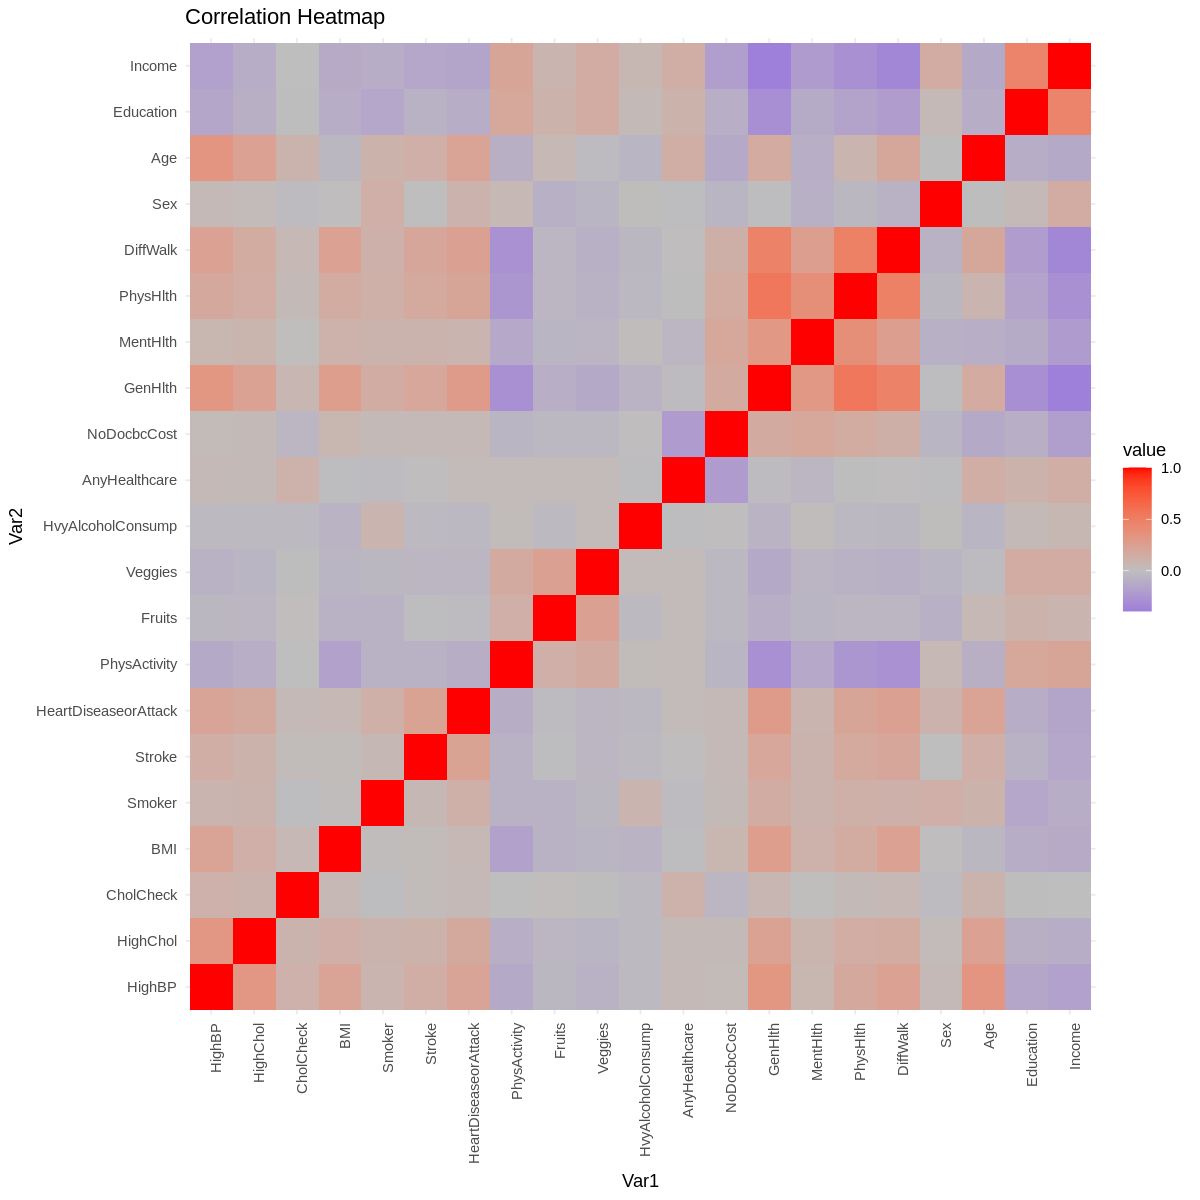

In [33]:
# Correlation Plot using heatmap
options(repr.plot.width = 10, repr.plot.height = 10)

# Convert back to numeric temporarily
df_numeric <- data.frame(lapply(train_data[, names(train_data) != "Diabetes"], function(x) as.numeric(as.character(x))))

# Correlation calculation
cor_matrix <- cor(df_numeric, use = "complete.obs", method = "pearson")

# Correlation Heatmap
cor_melted <- melt(cor_matrix)

ggplot(cor_melted, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "grey", midpoint = 0) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Correlation Heatmap")

# Exploring Generalized Modeling

In [34]:
# Baseline Models
set.seed(123)

# Setup parallel processing
num_cores <- 40
cl <- makePSOCKcluster(num_cores)
registerDoParallel(cl)

# Baseline train_control, just 10 cross validation
train_control_baseline <- trainControl(method = "cv", number = 10, allowParallel = TRUE)

In [35]:
# Logistic Regression
logit_model_baseline <- suppressWarnings(train(Diabetes ~ ., data = train_data, method = "glm", family = "binomial", trControl = train_control_baseline))

In [36]:
# K-Nearest Neighbors (KNN)
knn_model_baseline <- suppressWarnings(train(Diabetes ~ ., data = train_data, method = "knn", trControl = train_control_baseline))

In [37]:
# Naive Bayes
nb_model_baseline <- suppressWarnings(train(Diabetes ~ ., data = train_data, method = "naive_bayes", trControl = train_control_baseline))

In [38]:
# Linear Discriminant Analysis (LDA)
lda_model_baseline <- suppressWarnings(train(Diabetes ~ ., data = train_data, method = "lda", trControl = train_control_baseline))

In [39]:
# Quadratic Discriminant Analysis (QDA)
qda_model_baseline <- suppressWarnings(train(Diabetes ~ ., data = train_data, method = "qda", trControl = train_control_baseline))

In [40]:
# Ridge Classifier
ridge_model_baseline <- suppressWarnings(train(Diabetes ~ ., data = train_data, method = "glmnet", tuneGrid = expand.grid(alpha = 0, lambda = 0), trControl = train_control_baseline))

In [41]:
# Lasso Classifier
lasso_model_baseline <- suppressWarnings(train(Diabetes ~ ., data = train_data, method = "glmnet", tuneGrid = expand.grid(alpha = 1, lambda = 0), trControl = train_control_baseline))

In [42]:
# Elastic Net Classifier
elastic_net_model_baseline <- suppressWarnings(train(Diabetes ~ ., data = train_data, method = "glmnet", tuneGrid = expand.grid(alpha = c(0.1, 0.5, 0.9), lambda = 0), trControl = train_control_baseline))

In [43]:
# Decision Tree Classifier
decision_tree_model_baseline <- suppressWarnings(train(Diabetes ~ ., data = train_data, method = "rpart", trControl = train_control_baseline))

In [44]:
# Random Forest Classifier
random_forest_model_baseline <- suppressWarnings(train(Diabetes ~ ., data = train_data, method = "rf", trControl = train_control_baseline))

In [ ]:
# Boosting Tree Classifier
boosting_tree_model_baseline <- suppressWarnings(train(Diabetes ~ ., data = train_data, method = "gbm", trControl = train_control_baseline))

In [46]:
# Support Vector Machine (SVM) Classifier
svm_model_baseline <- suppressWarnings(train(Diabetes ~ ., data = train_data, method = "svmLinear", trControl = train_control_baseline))

In [47]:
# Close parallel processing
stopCluster(cl)

# Create a comparison table
classifier_baseline <- c("Logistic_Regression",
                         "K_Neares_Neighbors",
                         "Naive_Bayes",
                         "Linear_Discriminant_Analysis",
                         "Quadratic_Discriminant_Analysis",
                         "Ridge_Classifier",
                         "Lasso_Classifier",
                         "Elastic Net Classifier",
                         "Decision_Tree_Classifier",
                         "Random_Forest_Classifier",
                         "Boosting Tree Classifier",
                         "Support Vector Machine_Classifier")

classifier_baseline_accuracy <- c(max(logit_model_baseline$results$Accuracy),
                                  max(knn_model_baseline$results$Accuracy),
                                  max(nb_model_baseline$results$Accuracy),
                                  max(lda_model_baseline$results$Accuracy),
                                  max(qda_model_baseline$results$Accuracy),
                                  max(ridge_model_baseline$results$Accuracy),
                                  max(lasso_model_baseline$results$Accuracy),
                                  max(elastic_net_model_baseline$results$Accuracy),
                                  max(decision_tree_model_baseline$results$Accuracy),
                                  max(random_forest_model_baseline$results$Accuracy),
                                  max(boosting_tree_model_baseline$results$Accuracy),
                                  max(svm_model_baseline$results$Accuracy))

In [48]:
# Create a table and graph of the baseline results
classifier_baseline_df <- data.frame(Classifier = classifier_baseline,
                                     Accuracy = classifier_baseline_accuracy)

classifier_baseline_df

Classifier,Accuracy
<chr>,<dbl>
Logistic_Regression,0.7518923
K_Neares_Neighbors,0.7227174
Naive_Bayes,0.6375632
Linear_Discriminant_Analysis,0.7524926
Quadratic_Discriminant_Analysis,0.6530963
Ridge_Classifier,0.7510788
Lasso_Classifier,0.7525638
Elastic Net Classifier,0.7526341
Decision_Tree_Classifier,0.7048588


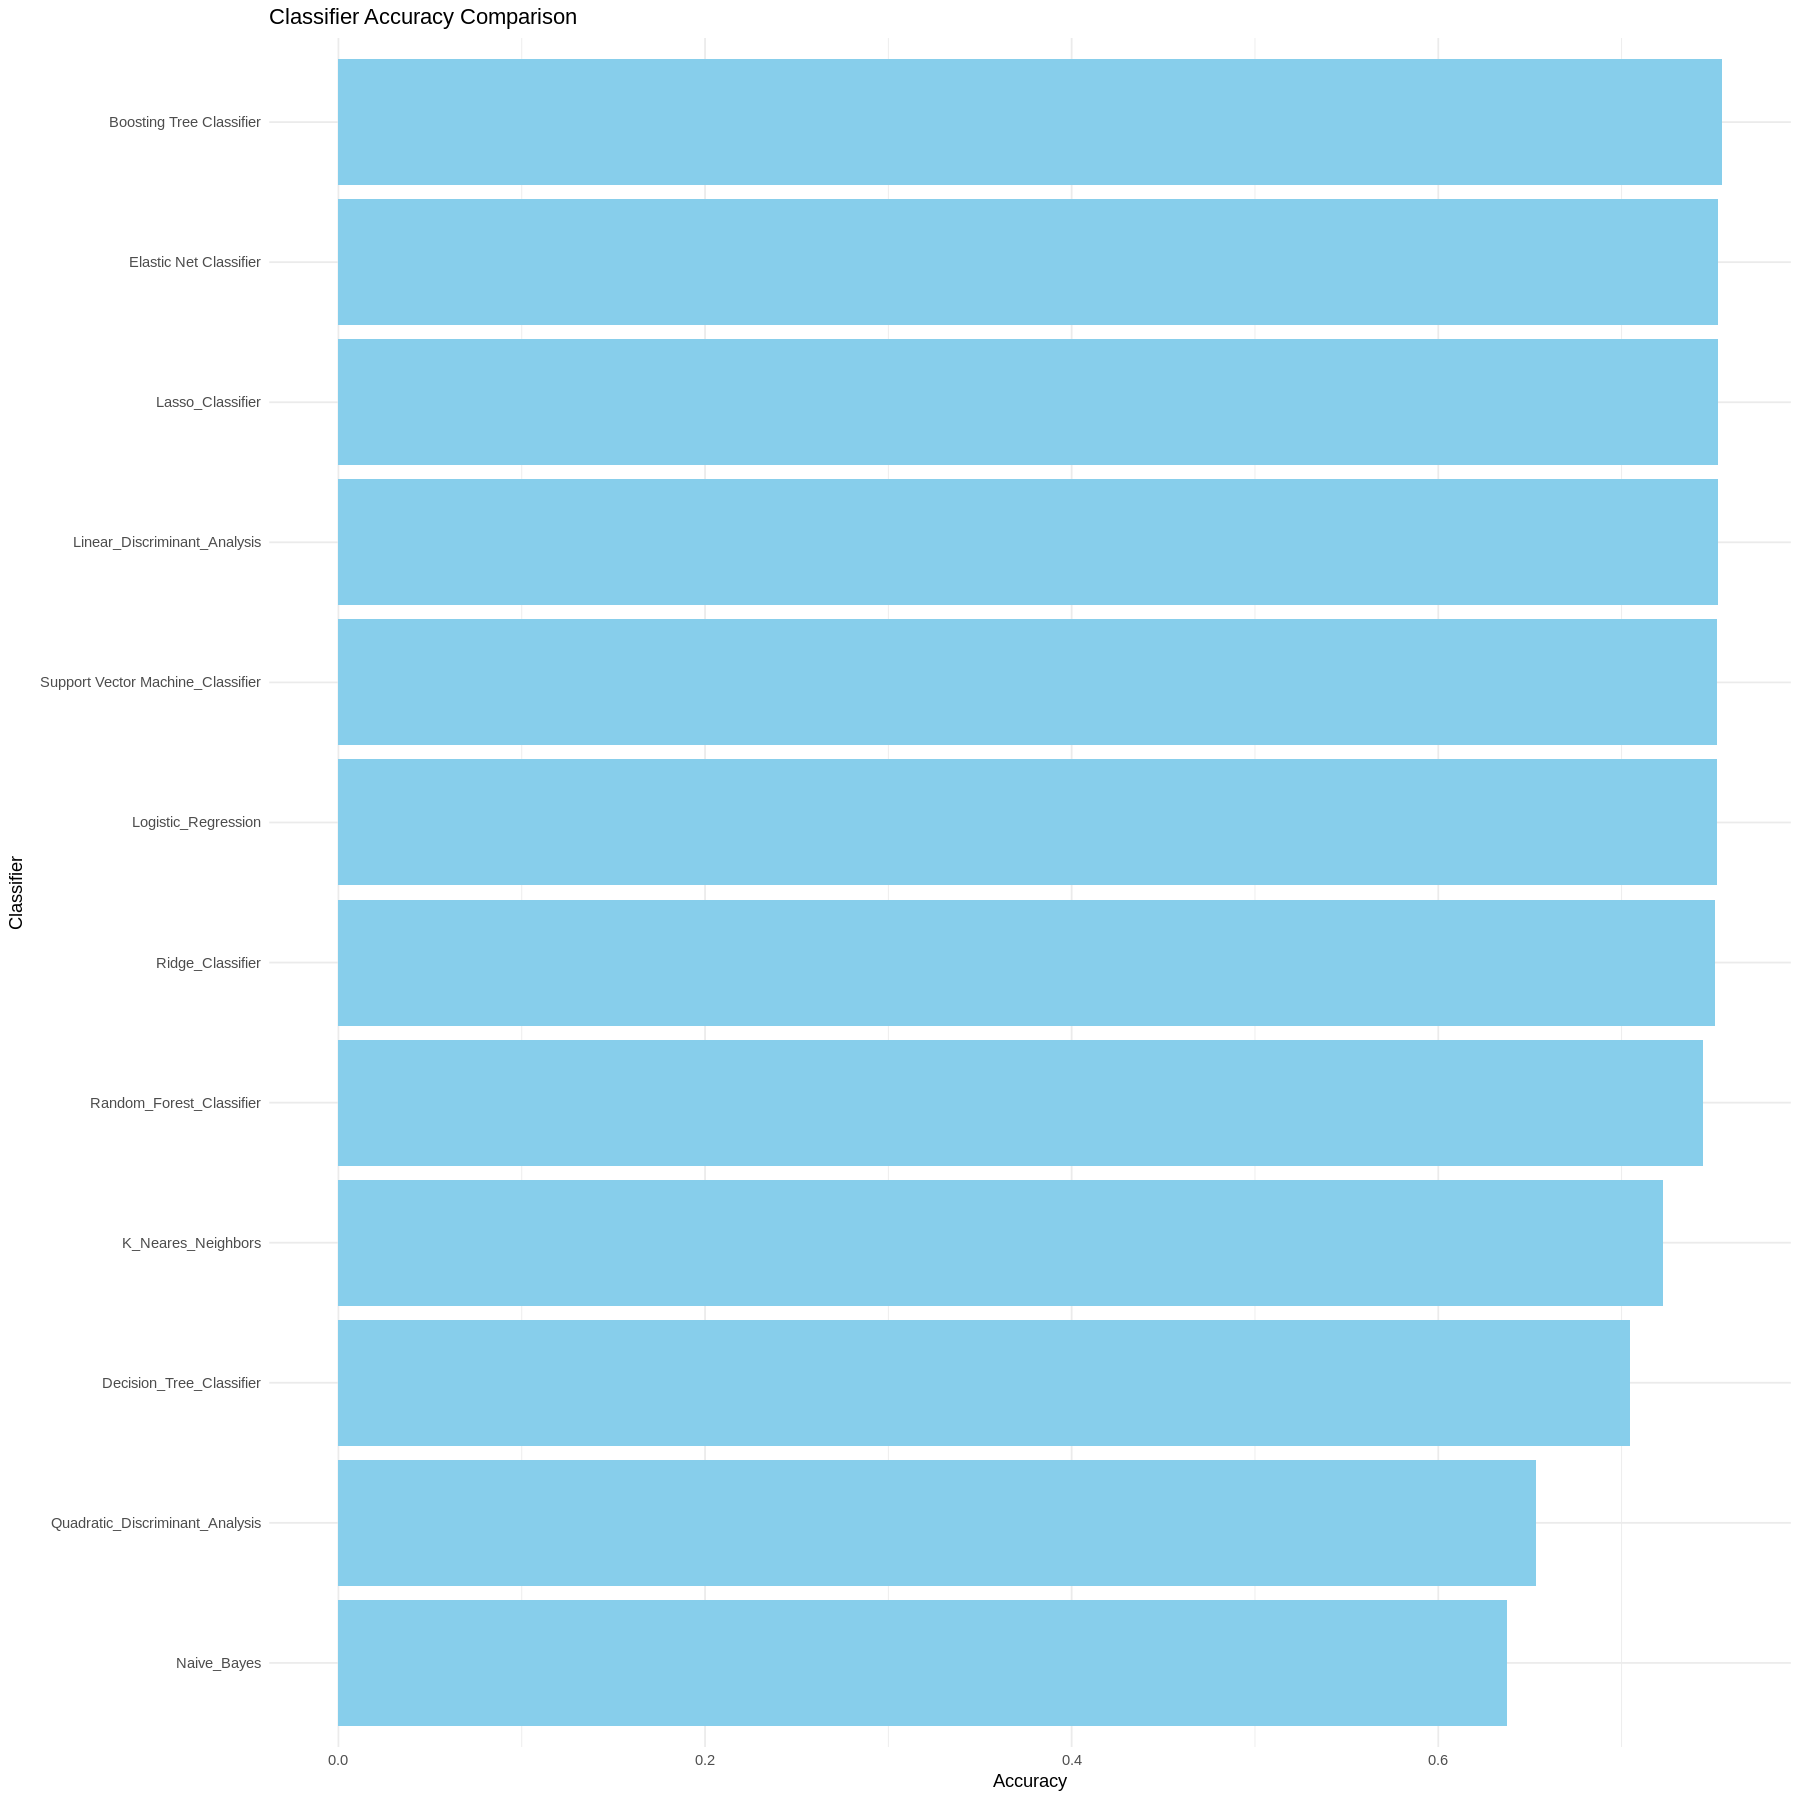

In [54]:
# Create the bar plot
ggplot(classifier_baseline_df, aes(x = reorder(Classifier, Accuracy), y = Accuracy)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +
  labs(title = "Classifier Accuracy Comparison",
       x = "Classifier",
       y = "Accuracy") +
  theme_minimal()

# Hyperparameter Tuning the Top 3 Models

## Boosting Tree Classifier - Rough Tune

In [54]:
# Set seed
set.seed(123)

# Setup parallel processing
num_cores <- 40
cl <- makePSOCKcluster(num_cores)
registerDoParallel(cl)

# Boosting tuning grid for hyperparameters
tuning_grid_boostingTree <- expand.grid(n.trees = c(200, 400),
                                        interaction.depth = c(1, 2, 3),
                                        shrinkage = c(0.01, 0.1, 0.05),
                                        n.minobsinnode = c(10, 30, 60))

train_control_boostingTree <- trainControl(method = "cv",
                                           number = 10,
                                           allowParallel = TRUE)

In [55]:
# Boosting Tree Classifier - Rough Tune
boosting_tree_model_GridTuned_Rough <- suppressWarnings(train(Diabetes ~ .,
                                                              data = train_data,
                                                              method = "gbm",
                                                              distribution = "bernoulli",
                                                              bag.fraction = 0.50,
                                                              tuneGrid = tuning_grid_boostingTree,
                                                              trControl = train_control_boostingTree))

stopCluster(cl)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3581            -nan     0.1000    0.0138
     2        1.3351            -nan     0.1000    0.0112
     3        1.3211            -nan     0.1000    0.0061
     4        1.3032            -nan     0.1000    0.0087
     5        1.2896            -nan     0.1000    0.0071
     6        1.2791            -nan     0.1000    0.0049
     7        1.2693            -nan     0.1000    0.0043
     8        1.2607            -nan     0.1000    0.0038
     9        1.2499            -nan     0.1000    0.0051
    10        1.2397            -nan     0.1000    0.0044
    20        1.1783            -nan     0.1000    0.0014
    40        1.1146            -nan     0.1000    0.0007
    60        1.0837            -nan     0.1000    0.0003
    80        1.0627            -nan     0.1000    0.0002
   100        1.0471            -nan     0.1000    0.0004
   120        1.0338            -nan     0.1000   -0.0001
   140        

In [56]:
boosting_tree_model_GridTuned_Rough$bestTune

,n.trees,interaction.depth,shrinkage,n.minobsinnode
,<dbl>,<dbl>,<dbl>,<dbl>
40,400,1,0.1,30


## Boosting Tree Classifier - Fine Tune

In [ ]:
# Set seed
set.seed(123)

# Setup parallel processing
num_cores <- 40
cl <- makePSOCKcluster(num_cores)
registerDoParallel(cl)

# Boosting tuning grid for hyperparameters
tuning_grid_boostingTree_fine <- expand.grid(n.trees = c(200, 400, 600, 800, 1000),
                                             interaction.depth = c(1, 3, 5, 7, 9, 11),
                                             shrinkage = c(0.0001, 0.001, 0.01, 0.1),
                                             n.minobsinnode = c(10, 30, 50))

train_control_boostingTree_fine <- trainControl(method = "cv",
                                                number = 10,
                                                classProbs = TRUE,
                                                summaryFunction = twoClassSummary,
                                                allowParallel = TRUE)

In [ ]:
# Boosting Tree Classifier - Fine Tune
boosting_tree_model_GridTuned_Fine <- suppressWarnings(train(Diabetes ~ .,
                                                             data = train_data,
                                                             method = "gbm",
                                                             distribution = "bernoulli",
                                                             bag.fraction = 0.50,
                                                             tuneGrid = tuning_grid_boostingTree_fine,
                                                             trControl = train_control_boostingTree_fine))

stopCluster(cl)

In [ ]:
# Using OOB Error to see to check if we generated enough trees for best parameters
# Final Model
print(boosting_tree_model_GridTuned_Fine$finalModel)

# Final Model OOB accuracy
oob_accuracy <- 1 - boosting_tree_model_GridTuned_Fine$finalModel$err.rate[boosting_tree_model_GridTuned_Fine$bestTune$n.trees, "OOB"]
print(paste("Final Model OOB Accuracy:", oob_accuracy))

# Plot Final Model OOB error rates over trees
plot(boosting_tree_model_GridTuned_Fine$finalModel$err.rate[, "OOB"],
     type = "l",
     main = "OOB Error vs Number of Trees",
     xlab = "Number of Trees",
     ylab = "OOB Error Rate")

## Elastic Net Classifier - Rough Tune

In [ ]:
# Set seed
set.seed(123)

# Setup parallel processing
num_cores <- 40
cl <- makePSOCKcluster(num_cores)
registerDoParallel(cl)

# Elastic Net tuning grid for hyperparameters
tuning_grid_ElasticNet <- expand.grid(alpha = seq(0, 1, by = 0.1),
                                      lambda = seq(0.0001, 0.1, length.out = 100))

train_control_ElasticNet <- trainControl(method = "cv",
                                         number = 10,
                                         allowParallel = TRUE)

In [ ]:
# Elastic Net Classifier - Rough Tune
elastic_net_model_GridTuned_Rough <- suppressWarnings(train(Diabetes ~ .,
                                                            data = train_data,
                                                            method = "glmnet",
                                                            scale = TRUE,
                                                            tuneGrid = tuning_grid_ElasticNet,
                                                            trControl = train_control_ElasticNet))

stopCluster(cl)

In [ ]:
# Best rough parameters
elastic_net_model_GridTuned_Rough$bestTune

## Elastic Net Classifier - Fine Tune

In [ ]:
# Reuce the hyperparameter space to an even tighter area around what was found as the bestTune in the rough

# Set seed
set.seed(123)

# Setup parallel processing
num_cores <- 40
cl <- makePSOCKcluster(num_cores)
registerDoParallel(cl)

# Elastic Net tuning grid for hyperparameters
tuning_grid_ElasticNet_fine <- expand.grid(alpha = seq(0.1, 0.6, by = 0.05),
                                           lambda = 10^seq(-6, -2, length = 20))

train_control_ElasticNet_fine <- trainControl(method = "cv",
                                              number = 10,
                                              allowParallel = TRUE)

In [ ]:
# Elastic Net Classifier - Fine Tune
elastic_net_model_GridTuned_Fine <- suppressWarnings(train(Diabetes ~ .,
                                                           data = train_data,
                                                           method = "glmnet",
                                                           scale = TRUE,
                                                           tuneGrid = tuning_grid_ElasticNet_fine,
                                                           trControl = train_control_ElasticNet_fine))

stopCluster(cl)

In [ ]:
# Best fine parameters
elastic_net_model_GridTuned_Fine$bestTune

In [ ]:
# Associated Best Accuracy
elastic_net_model_GridTuned_Fine$results[elastic_net_model_GridTuned_Fine$results$alpha == elastic_net_model_GridTuned_Fine$bestTune$alpha &
                                         elastic_net_model_GridTuned_Fine$results$lambda == elastic_net_model_GridTuned_Fine$bestTune$lambda, ]

In [ ]:
# Heatmap used to support best parameters are found
elastic_net_model_GridTuned_Fine$results %>%
  ggplot(aes(x = log(lambda), y = alpha, fill = Accuracy)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "orange")

# Support Vector Machine Classifier - Rough Tune

# Support Vector Machine Classifier - Fine Tune

# Final Validation on Hidden Test Set

In [19]:
# Check the hidden test_data generated at start of code
dim(test_data)

[1] 42414    22

In [20]:
table(test_data$Diabetes)


   No   Yes 
21207 21207 

## Boosting Tree Classifier Performance

In [ ]:
# Make predictions using the final model
predictions_boosting_tree <- predict(boosting_tree_model_GridTuned_Fine, newdata = test_data)

# Generate confusion_matrix
confusion_matrix_boosting_tree <- confusionMatrix(predictions_boosting_tree, test_data$Diabetes)

# Print output
print(confusion_matrix_boosting_tree)

In [ ]:
# Generate associated Feature Importance
summary(boosting_tree_model_GridTuned_Fine$finalModel,
  method = relative.influence,
  normalize = TRUE, las = 2)

## Elastic Net Classifier Performance

In [ ]:
# Make predictions using the final model
predictions_elastic_net <- predict(elastic_net_model_GridTuned_Fine, newdata = test_data)

# Generate confusion_matrix
confusion_matrix_elastic_net <- confusionMatrix(predictions_elastic_net, test_data$Diabetes)

# Print output
print(confusion_matrix_elastic_net)

In [ ]:
# Extract coefficients for feature importance
coefficients <- coef(elastic_net_model_GridTuned_Fine$finalModel,
                     elastic_net_model_GridTuned_Fine$bestTune$lambda)

# Convert to matrix then to data frame
coefficients <- as.matrix(coefficients)

coef_df <- data.frame(feature = rownames(coefficients),
                      coefficient = coefficients[,1])

# Plot the coefficients
ggplot(coef_df, aes(x = reorder(feature, coefficient), y = coefficient)) +
       geom_col(fill = "skyblue") +
       coord_flip() +
       labs(title = "Elastic Net Coefficients", x = "Feature", y = "Coefficient") +
       theme_minimal()

## Support Vector Machine Classifier Performance

In [57]:
predictions <- predict(boosting_tree_model_GridTuned_Rough, newdata = test_data)
# Assuming 'test_data' is your test dataset

library(caret)

confusion_matrix <- confusionMatrix(predictions, test_data$Diabetes)
# Assuming 'Diabetes' is your target variable column

print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction    No   Yes
       No  15556  5238
       Yes  5651 15969
                                          
               Accuracy : 0.7433          
                 95% CI : (0.7391, 0.7474)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4865          
                                          
 Mcnemar's Test P-Value : 7.873e-05       
                                          
            Sensitivity : 0.7335          
            Specificity : 0.7530          
         Pos Pred Value : 0.7481          
         Neg Pred Value : 0.7386          
             Prevalence : 0.5000          
         Detection Rate : 0.3668          
   Detection Prevalence : 0.4903          
      Balanced Accuracy : 0.7433          
                                          
       'Positive' Class : No              
                  

,var,rel.inf
,<chr>,<dbl>
HighBP1,HighBP1,23.0938656
BMI,BMI,15.8372935
DiffWalk1,DiffWalk1,7.3249684
HighChol1,HighChol1,7.0456730
GenHlth4,GenHlth4,5.3667720
GenHlth2,GenHlth2,3.0646092
GenHlth5,GenHlth5,2.5516929
Income8,Income8,2.4630165
Age4,Age4,2.3248574


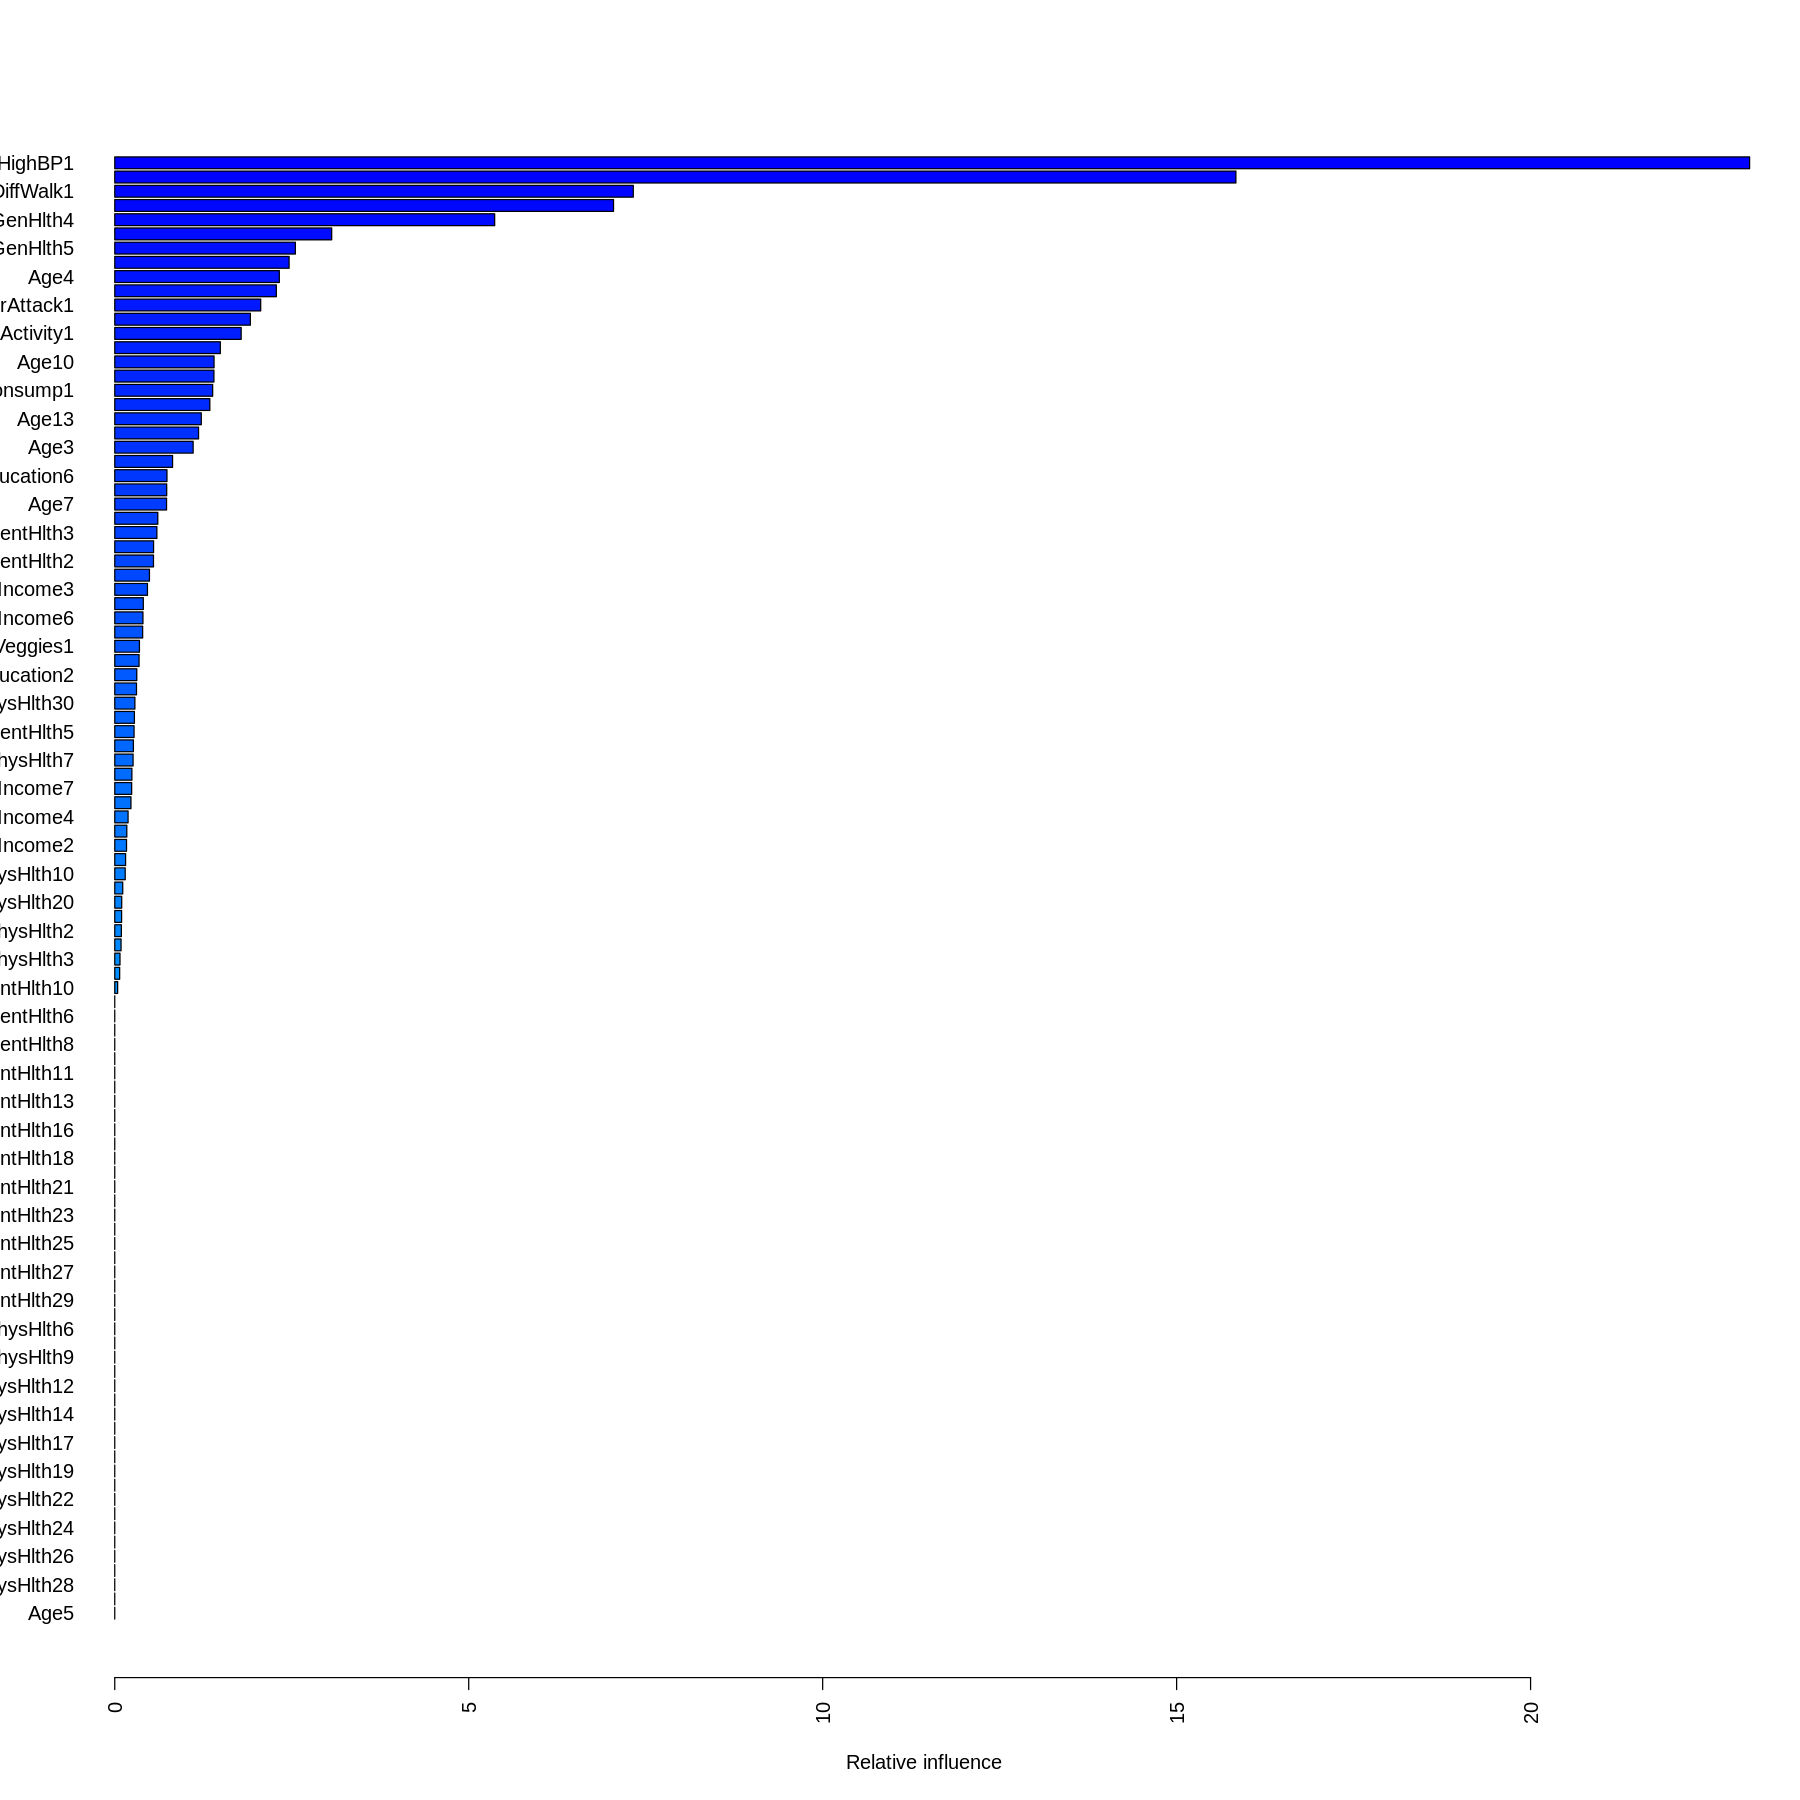

In [58]:
summary(boosting_tree_model_GridTuned_Rough$finalModel,
  method = relative.influence,
  normalize = TRUE, las = 2)